In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data

In [2]:
df = pd.read_csv("singindex_social_data.csv", index_col=0)
metadf = pd.read_csv("singindex_social_metadata.csv")

In [3]:
df.describe()

,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Fertility rate, total (births per woman)",GDP growth (annual %),"Government expenditure on education, total (% of government expenditure)",Individuals using the Internet (% of population),"Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)","Life expectancy at birth, total (years)","Literacy rate, adult total (% of people ages 15 and above)","Patent applications, residents",...,People using safely managed sanitation services (% of population),Population ages 65 and above (% of total population),Proportion of seats held by women in national parliaments (%),Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Research and development expenditure (% of GDP),"School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)",Scientific and technical journal articles,Strength of legal rights index (0=weak to 12=strong),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
count,17.000000,22.000000,48.000000,49.000000,18.000000,28.000000,30.000000,48.000000,44.000000,3.500000e+01,...,18.000000,49.000000,24.000000,30.000000,18.000000,48.000000,48.000000,1.900000e+01,7.000000,30.000000
mean,54.612613,82.503476,3.089983,2.942689,14.195870,16.868504,68.474116,66.651482,77.820765,1.031669e+06,...,35.684193,6.804328,18.703534,67.089182,2.041769,99.362506,0.900980,1.810663e+06,5.149085,5.683837
std,3.177581,4.554028,0.620754,1.691507,0.373033,15.903173,1.416573,3.707685,6.425703,5.500186e+05,...,5.602776,1.025520,4.131960,0.448077,0.050190,3.237418,0.064668,4.886644e+05,0.378267,0.352572
min,49.401348,72.658001,2.402707,-3.593456,13.360160,0.049235,66.492232,59.596507,66.915123,4.559730e+05,...,28.204854,5.427446,11.692171,66.425207,1.965245,90.138740,0.788390,1.067910e+06,4.682540,4.801821
25%,52.057224,80.046703,2.564047,2.168782,14.031228,1.860499,67.049981,63.955437,71.815376,6.185860e+05,...,30.811585,5.936185,15.192886,66.691994,1.998616,97.676393,0.838583,1.406395e+06,4.878446,5.503498
50%,54.752746,82.244513,2.839780,3.020667,14.171432,13.153998,68.691337,66.415945,79.617149,8.322920e+05,...,35.399676,6.613460,18.733921,67.146318,2.050741,99.237485,0.897990,1.853967e+06,5.042105,5.697594
75%,57.242980,85.408032,3.571788,3.946260,14.363701,29.352182,69.784285,69.668652,83.410635,1.226224e+06,...,40.143910,7.434625,22.353547,67.476377,2.072662,102.229100,0.960172,2.219517e+06,5.432860,5.897991
max,59.340671,90.084031,4.539704,6.554098,15.049030,48.996912,70.322145,72.741689,86.478302,2.294881e+06,...,44.987022,9.317803,25.580431,67.710442,2.133974,104.178600,1.000060,2.554373e+06,5.696335,6.471281


## Pre-processing

### Build index components

In [4]:
index_comps, metadf_rows = [], []
for (k, j) in enumerate(metadf["indicator"]):
    
    if metadf["improvement"].iloc[k] != 0:
        
        if (len(df[j].dropna()) > 2):
        
            # base value
            med_value = df[j].median()

            if np.isnan(med_value) == 0:

                # indicator and direction
                indicator = (df[[j]]/med_value) ** metadf["improvement"].iloc[k]

                if k==0:
                    df_index = indicator.copy()
                else:
                    df_index = pd.concat([df_index, indicator.copy()], axis=1)
                
                index_comps += [j]
                metadf_rows += [k]
                
df_index.index = df.index.copy()

### Export info

In [5]:
df[index_comps].to_csv("singindex_social_raw_components.csv")
df_index.to_csv("singindex_social_base_components.csv")
metadf.iloc[metadf_rows].to_csv("singindex_social_novel_metadata.csv")

## Interpolation, Build Index, and Extrapolation

In [6]:
from scipy import interpolate

In [32]:
# interpolation
df_interp_index = df_index.interpolate(method="spline", order=2)

<AxesSubplot:xlabel='Date'>

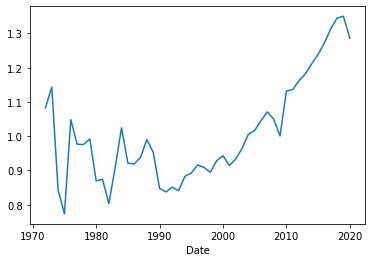

In [33]:
# build index
singindex_historic = df_interp_index.mean(axis=1)
singindex_historic.plot()

In [34]:
# model index to extrapolate (exclude 2020 data)
s_model = interpolate.interp1d(singindex_historic.index[-20:-1], singindex_historic.values[-20:-1], fill_value="extrapolate")

<AxesSubplot:>

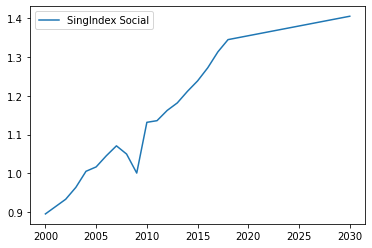

In [35]:
singindex = pd.DataFrame({"SingIndex Social": s_model(range(2000, 2031))},
            index = list(range(2000, 2031)))
singindex.plot()

In [36]:
singindex[-15:]

,SingIndex Social
2016,1.272492
2017,1.313589
2018,1.345169
2019,1.350197
2020,1.355225
2021,1.360252
2022,1.365280
2023,1.370307
2024,1.375335
2025,1.380362


### Export

In [37]:
df_interp_index.to_csv("singindex_social_base_components_interpolate.csv")
singindex_historic.to_csv("singindex_social_avg_interpolate.csv")
singindex.to_csv("singindex_social_avg_extrapolate_2000_2030.csv")